# 1.Import Libraries and Load Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('AviationData.csv', encoding='latin-1') # or encoding='cp1252'
print((df.info))

C:\Users\STEEL R3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United

In [19]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 2.Data Cleaning 
## .Drop Columns With Excessive Missing Valuesabs
## .Convert 'Event.Date' to datetime formatabs
## .Convert injury-related columns to numeric values

In [31]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Convert 'Event.Date' to datetime format
df_cleaned.loc[:, 'Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce')


# Convert injury-related columns to numeric values
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_columns:
    if col in df_cleaned.columns:
         df_cleaned.loc[:, 'Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce') # Convert to numeric, replacing errors with NaN

# Display the cleaned DataFrame
print(df_cleaned.info())
print(df_cleaned.head())

C:\Users\STEEL R3\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Airport.Code            50249 non-null  object        
 7   Airport.Name            52790 non-null  object        
 8   Injury.Severity         87889 non-null  object        
 9   Aircraft.damage         85695 non-null  object        
 10  Registration.Number     87572 non-null  object        
 11  Make                    88826 non-null  object        
 12  Model                   88797 non-null  object

# 3.Checking correlations between numeric variables of Injury data

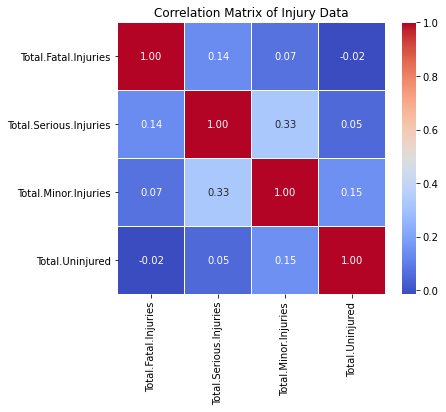

In [36]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_cleaned[injury_columns].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Injury Data")

plt.show()

# 4. Highlight some Key Insights

In [42]:
# Summary statistics of injury-related data
injury_summary = df_cleaned[injury_columns].describe()

# Count of accidents per weather condition
weather_counts = df_cleaned["Weather.Condition"].value_counts()

# Count of accidents per phase of flight
flight_phase_counts = df_cleaned["Broad.phase.of.flight"].value_counts()

injury_summary, weather_counts, flight_phase_counts


(       Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
 count          77488.000000            76379.000000          76956.000000   
 mean               0.647855                0.279881              0.357061   
 std                5.485960                1.544084              2.235625   
 min                0.000000                0.000000              0.000000   
 25%                0.000000                0.000000              0.000000   
 50%                0.000000                0.000000              0.000000   
 75%                0.000000                0.000000              0.000000   
 max              349.000000              161.000000            380.000000   
 
        Total.Uninjured  
 count     82977.000000  
 mean          5.325440  
 std          27.913634  
 min           0.000000  
 25%           0.000000  
 50%           1.000000  
 75%           2.000000  
 max         699.000000  ,
 VMC    77303
 IMC     5976
 UNK      856
 Unk      262
 Name

# 5.Visualizations supporting the Insights

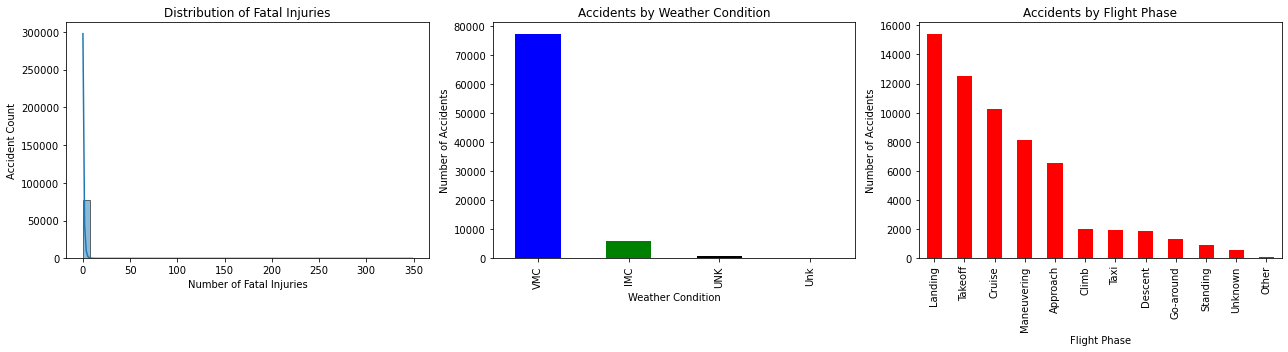

In [75]:
# Set up the figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Distribution of Fatal Injuries
sns.histplot(df_cleaned["Total.Fatal.Injuries"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Fatal Injuries")
axes[0].set_xlabel("Number of Fatal Injuries")
axes[0].set_ylabel("Accident Count")

# 2. Weather Conditions in Accidents
weather_counts.plot(kind="bar", color=["blue", "green", "black", "yellow"], ax=axes[1])
axes[1].set_title("Accidents by Weather Condition")
axes[1].set_xlabel("Weather Condition")
axes[1].set_ylabel("Number of Accidents")

# 3. Flight Phases with Most Accidents
flight_phase_counts.plot(kind="bar", color="red", ax=axes[2])
axes[2].set_title("Accidents by Flight Phase")
axes[2].set_xlabel("Flight Phase")
axes[2].set_ylabel("Number of Accidents")

plt.tight_layout()
plt.show()


# 6.Display The Cleaned Aviation Data 

In [45]:
df.to_csv('cleaned_aviation_data.csv', index=False)
df = pd.read_csv('cleaned_aviation_data.csv')
df.head()

C:\Users\STEEL R3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
